Charging Points Data:
  region  year  value
0  India  2016     25
1  India  2017     25
2  India  2017    220
3  India  2018     25
4  India  2018    330

State Data:
               State  Operational PCS
0  Andaman & Nicobar                3
1     Andhra Pradesh              327
2  Arunachal Pradesh                9
3              Assam               86
4              Bihar              124

Highway Data:
       National Highway  No. of operational PCS
0   National Highway-10                       1
1   National Highway-11                       3
2  National Highway-128                       1
3   National Highway-13                       3
4  National Highway-130                       1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


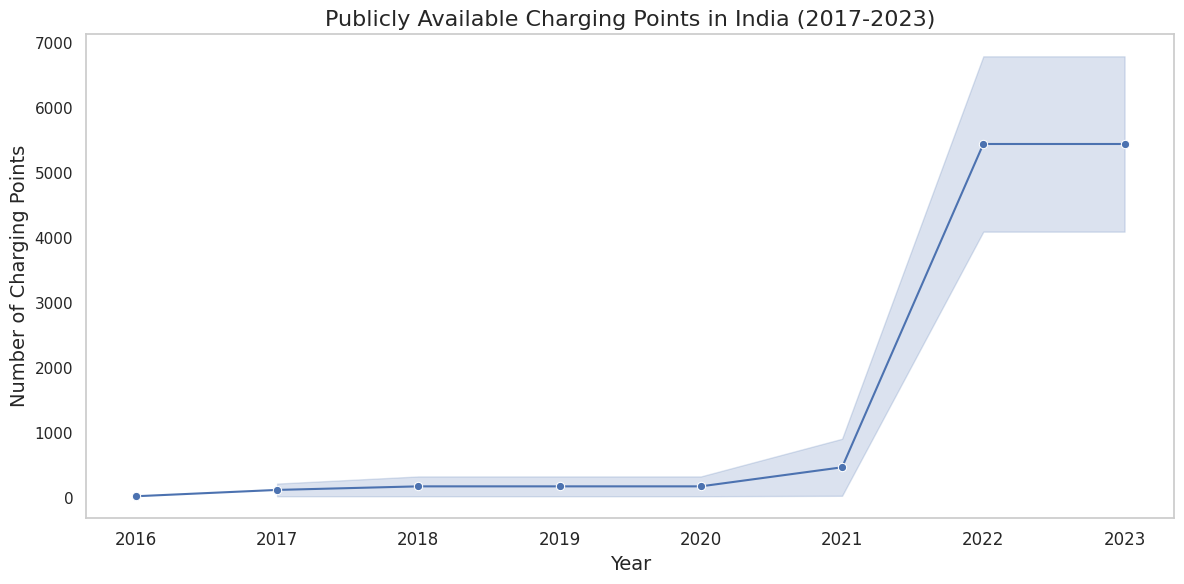

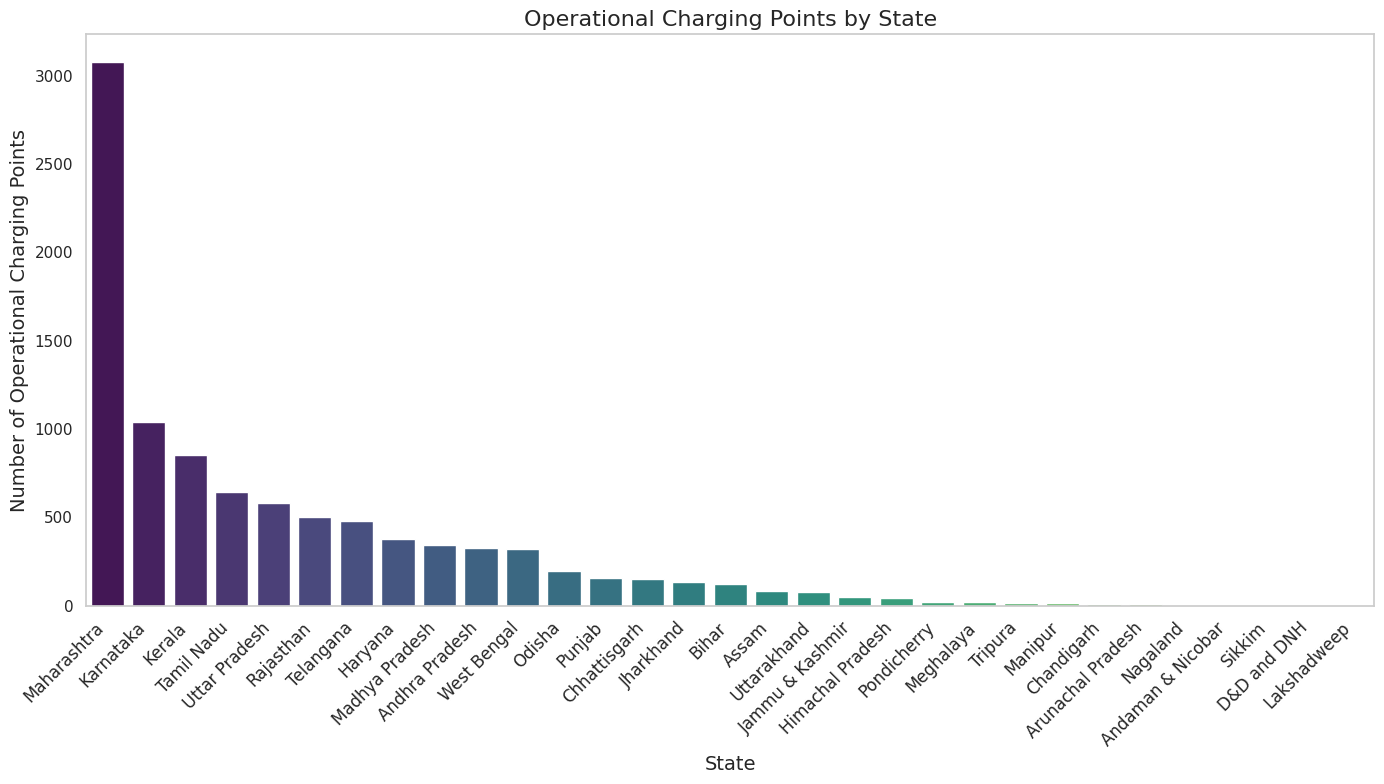

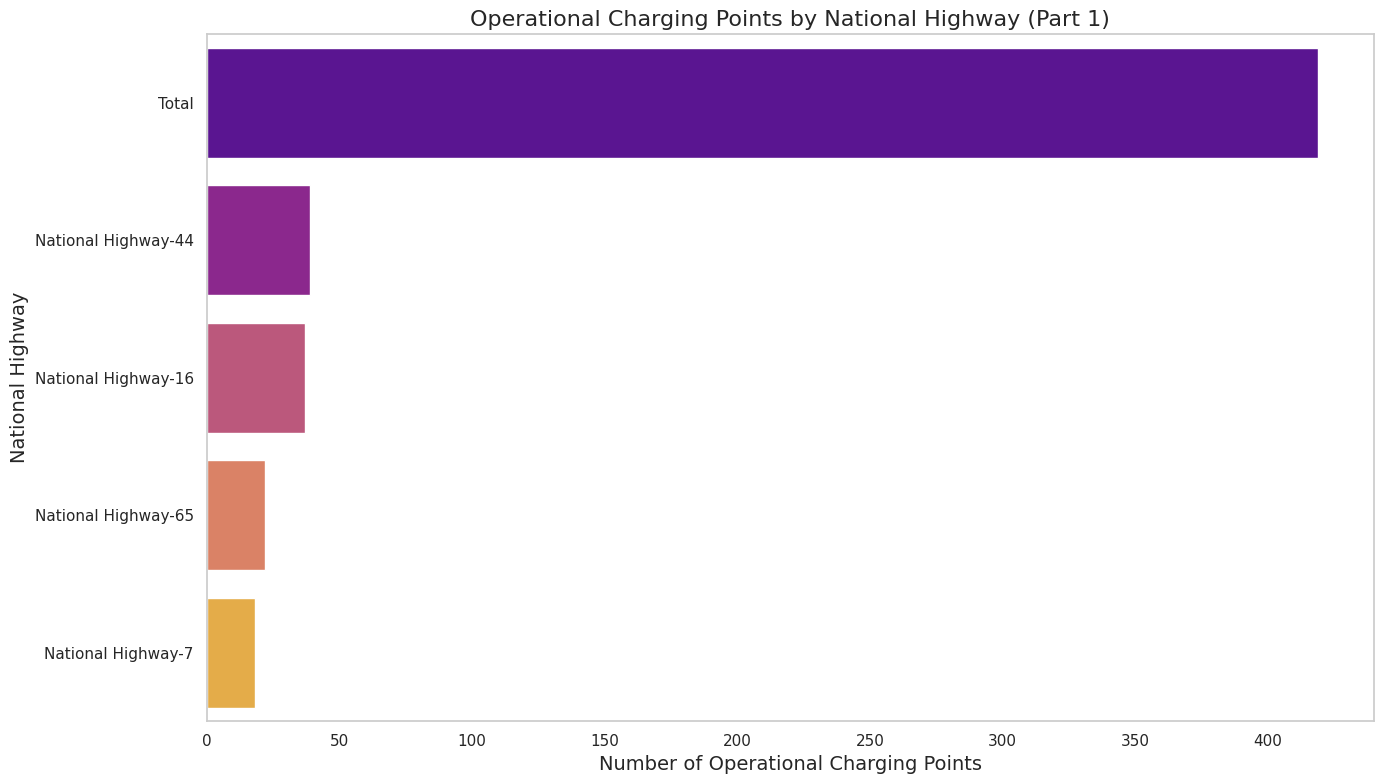

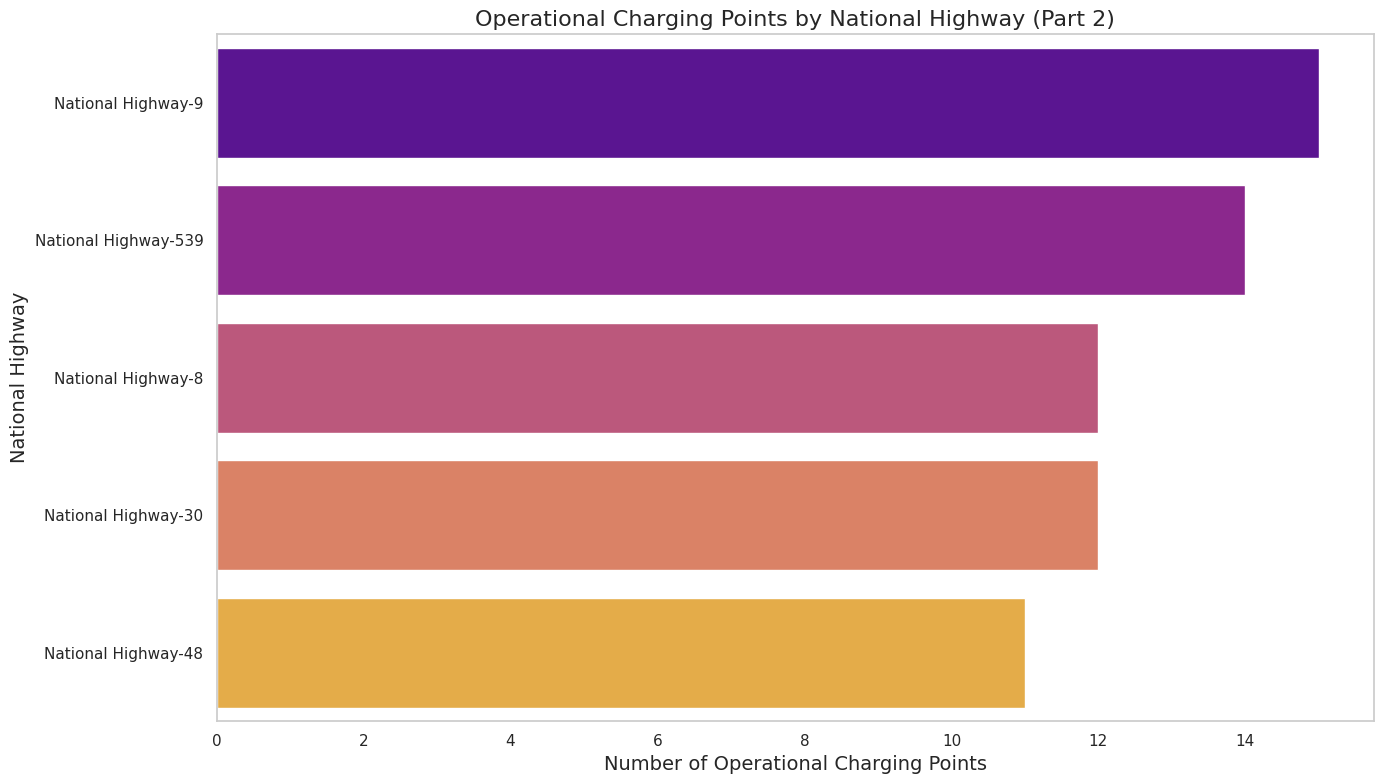

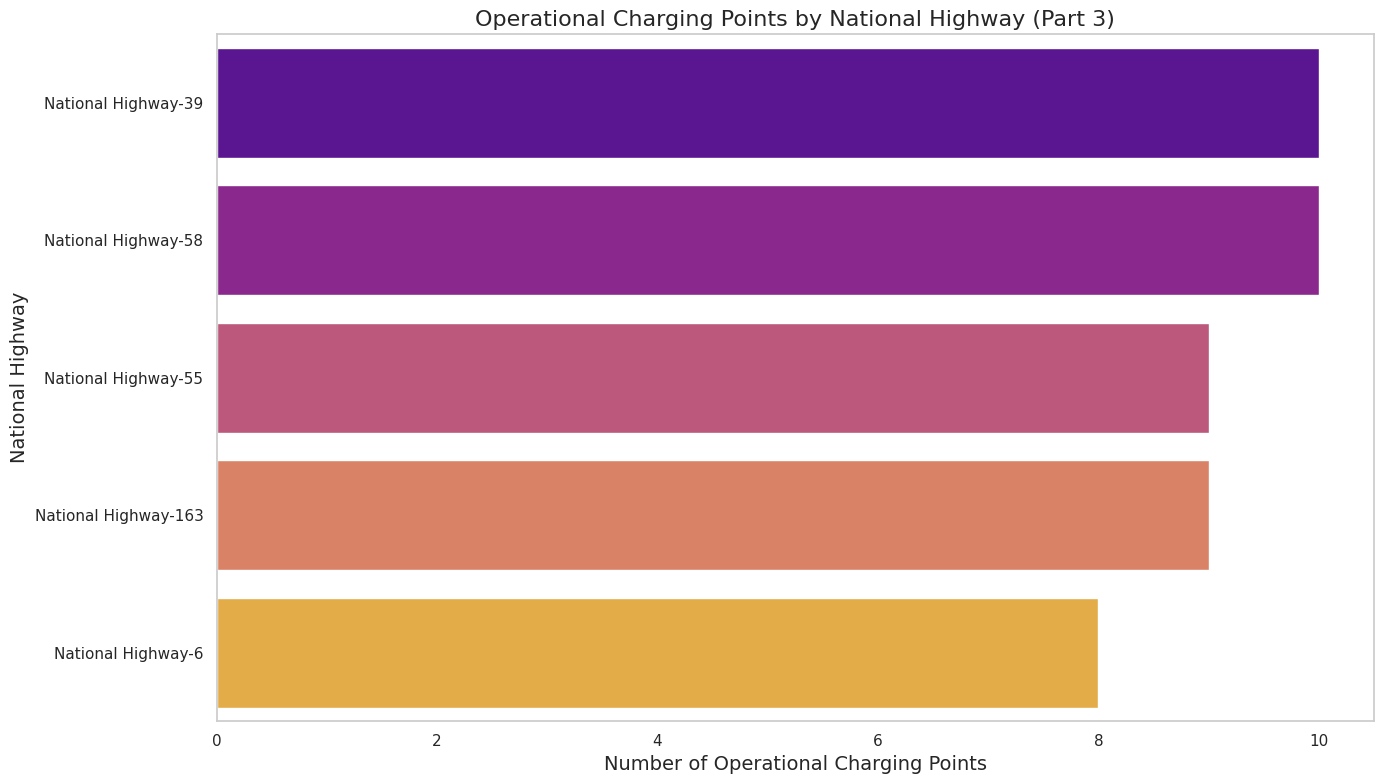

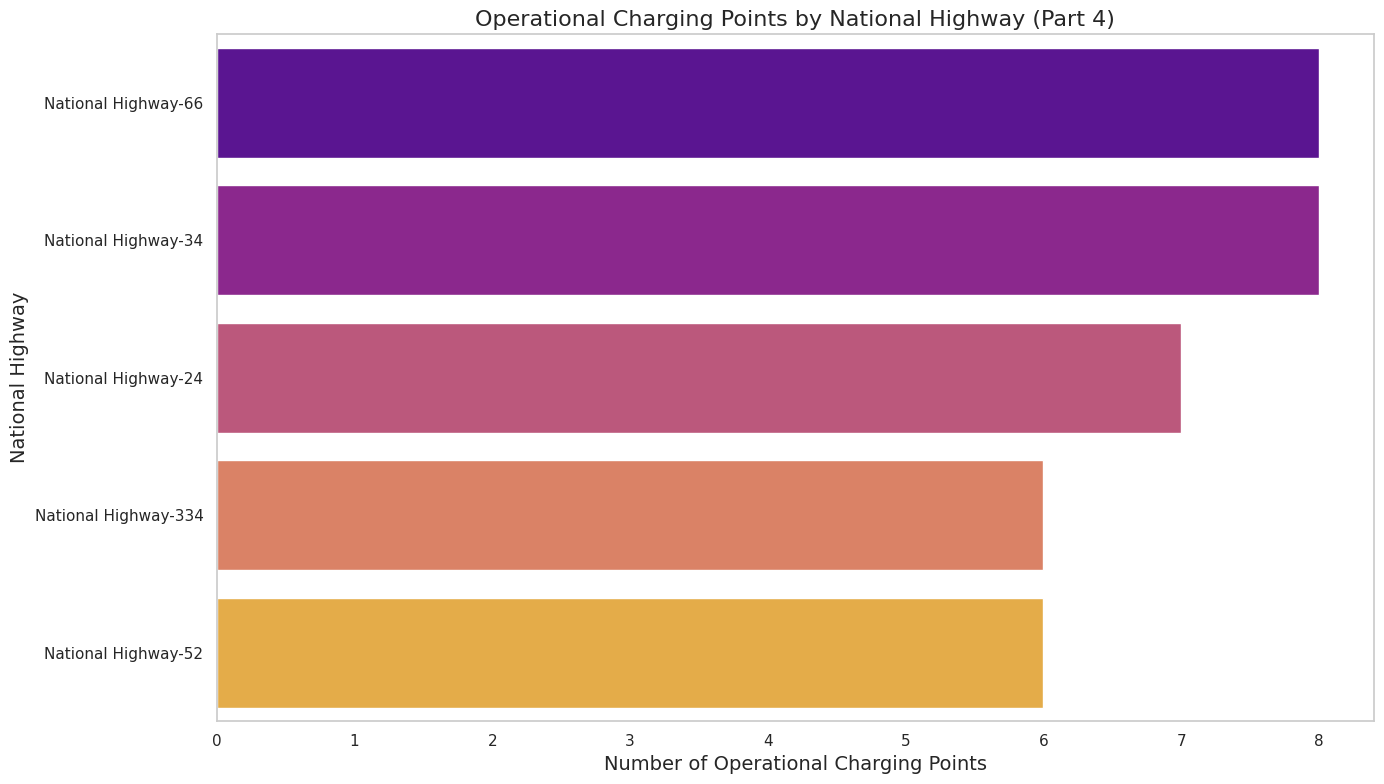

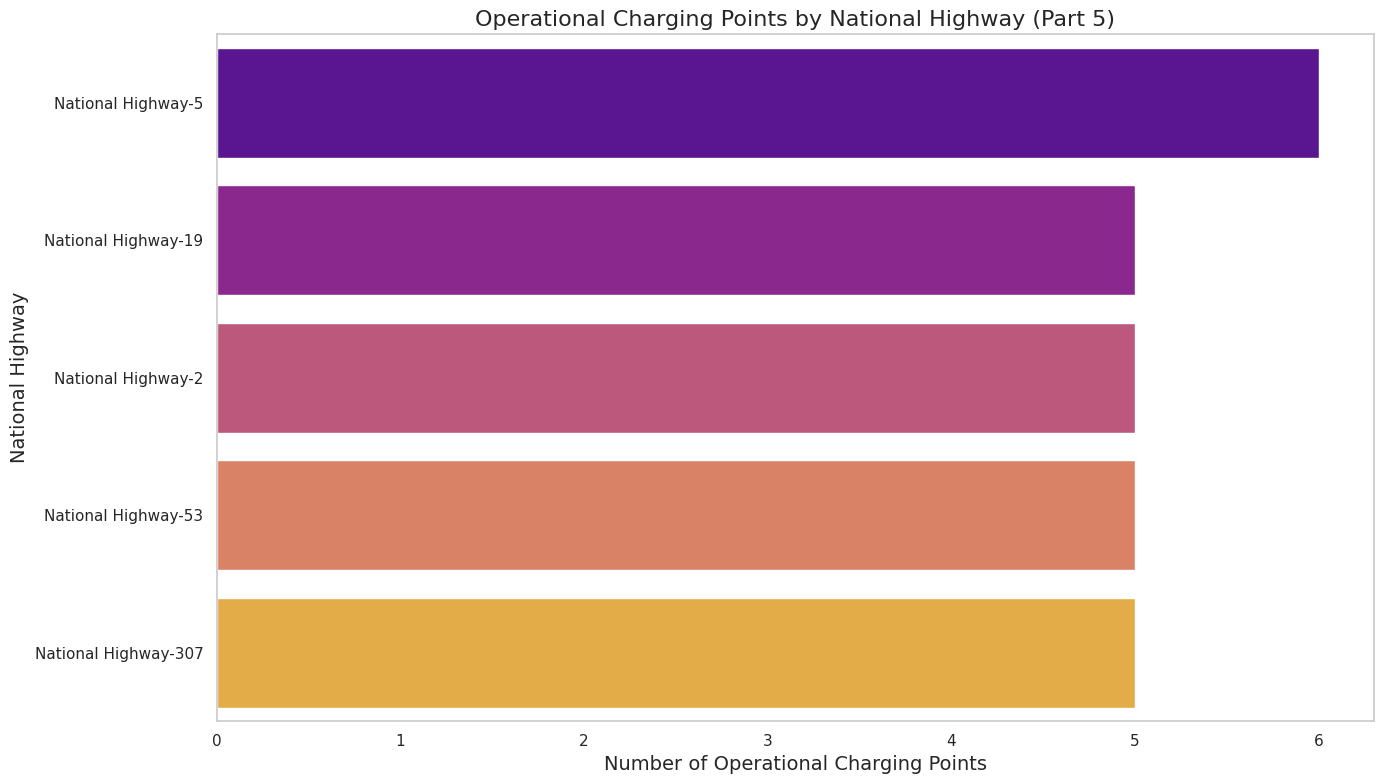

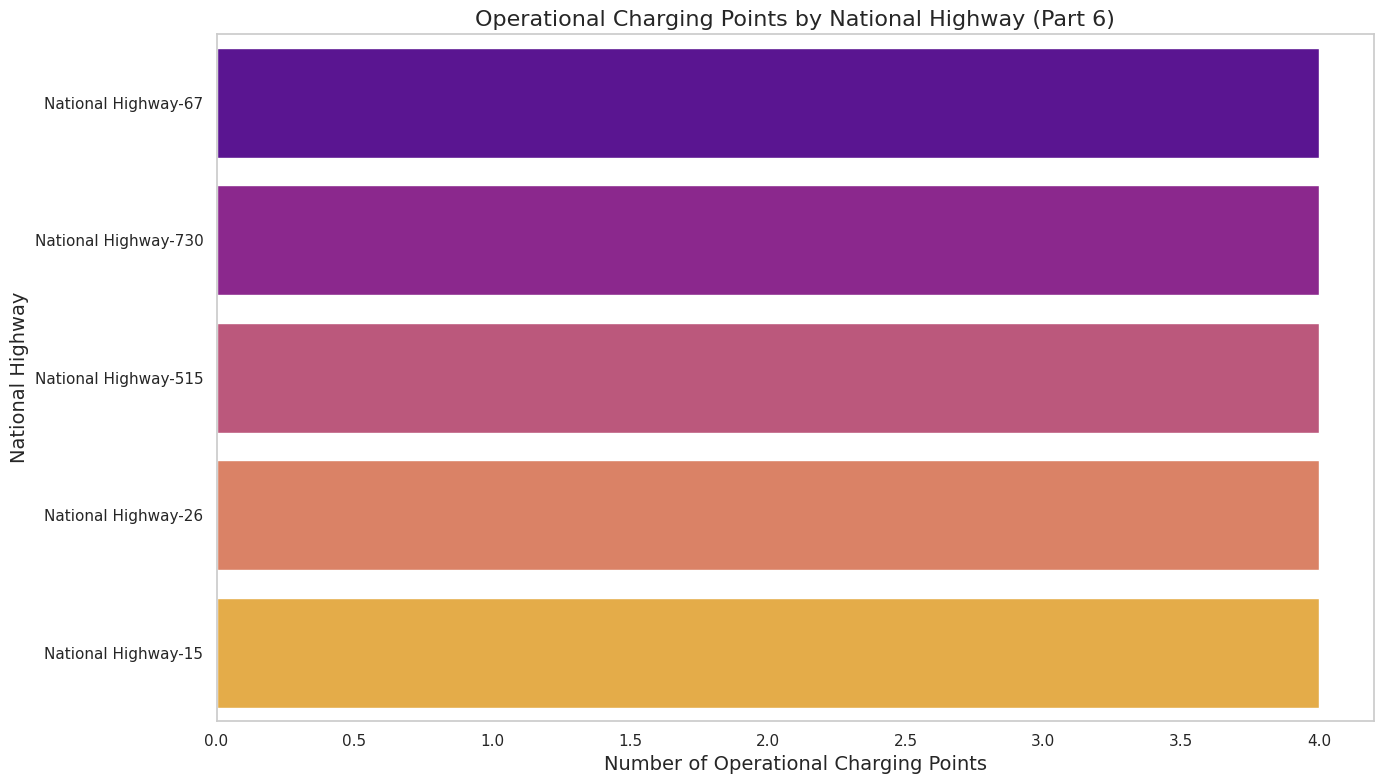

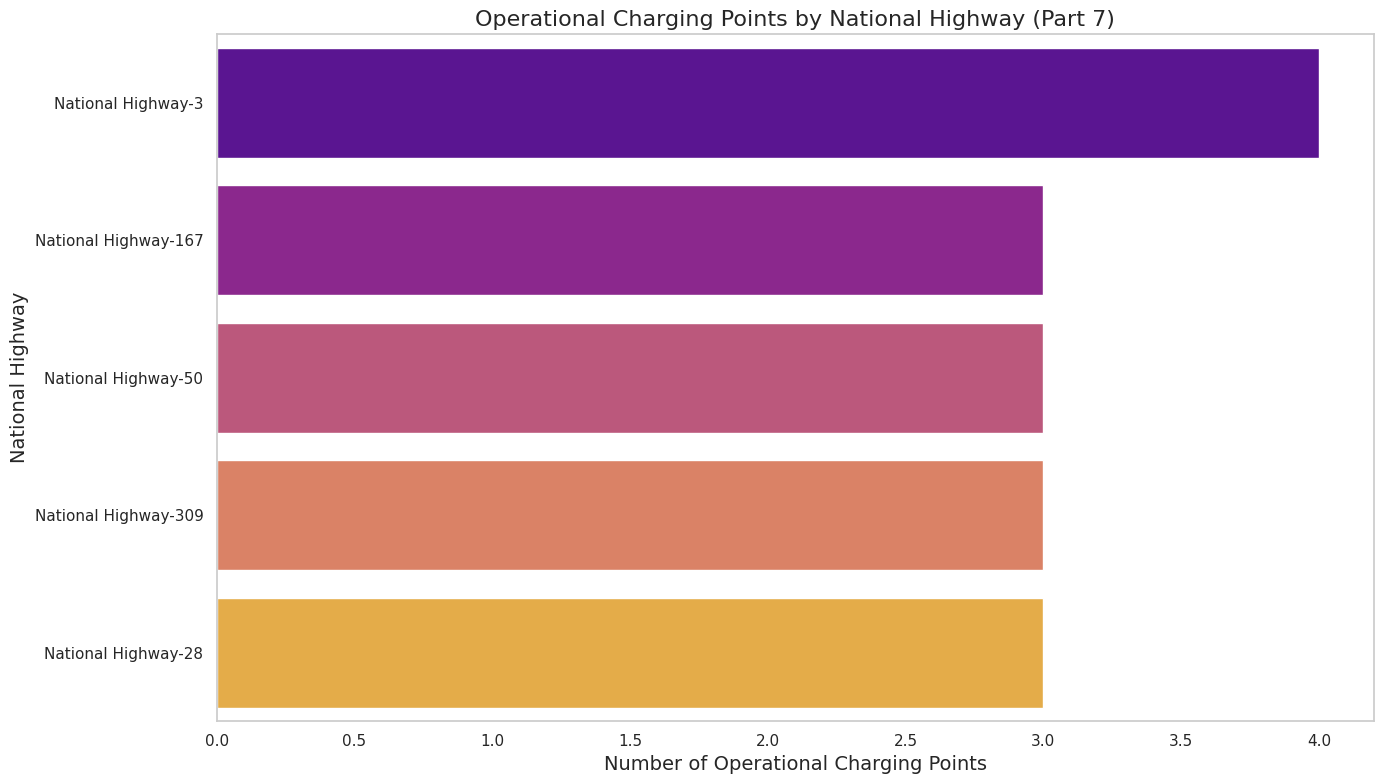

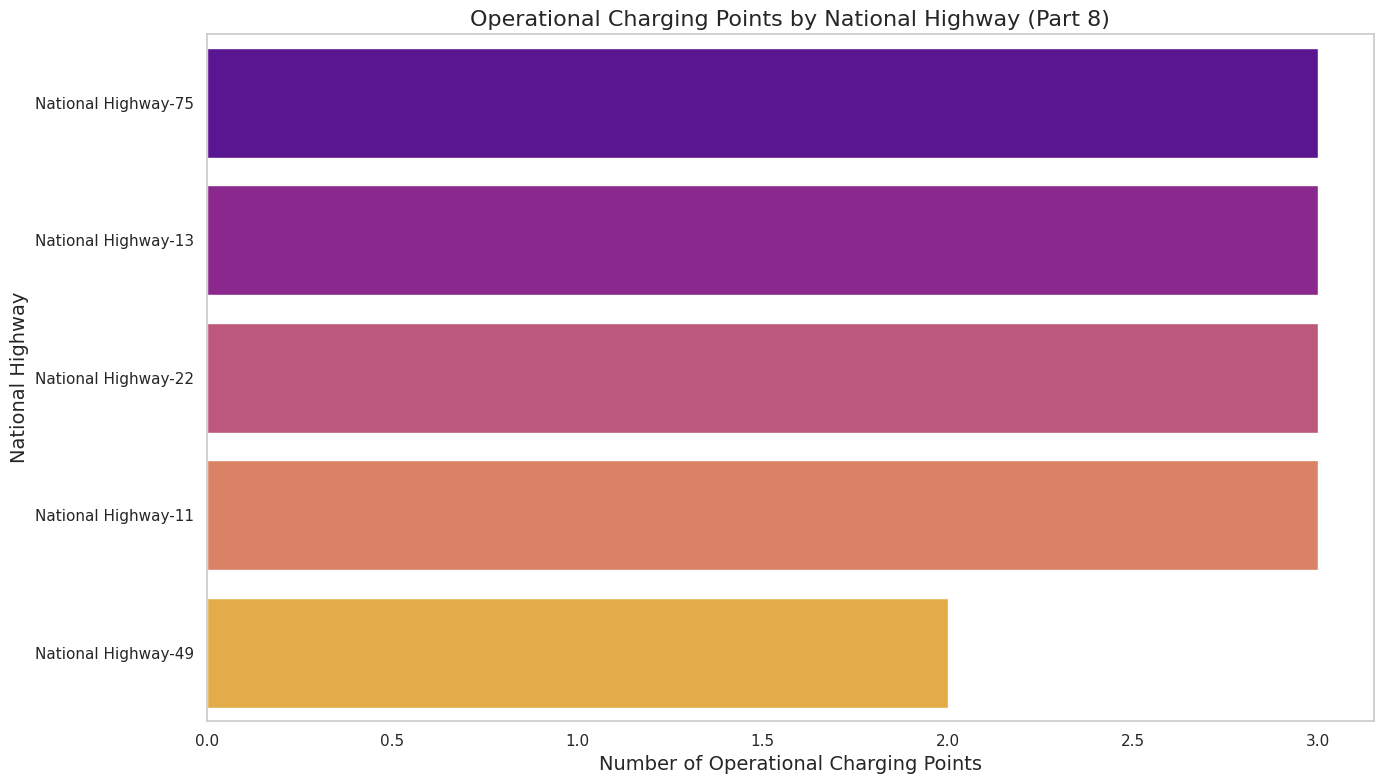

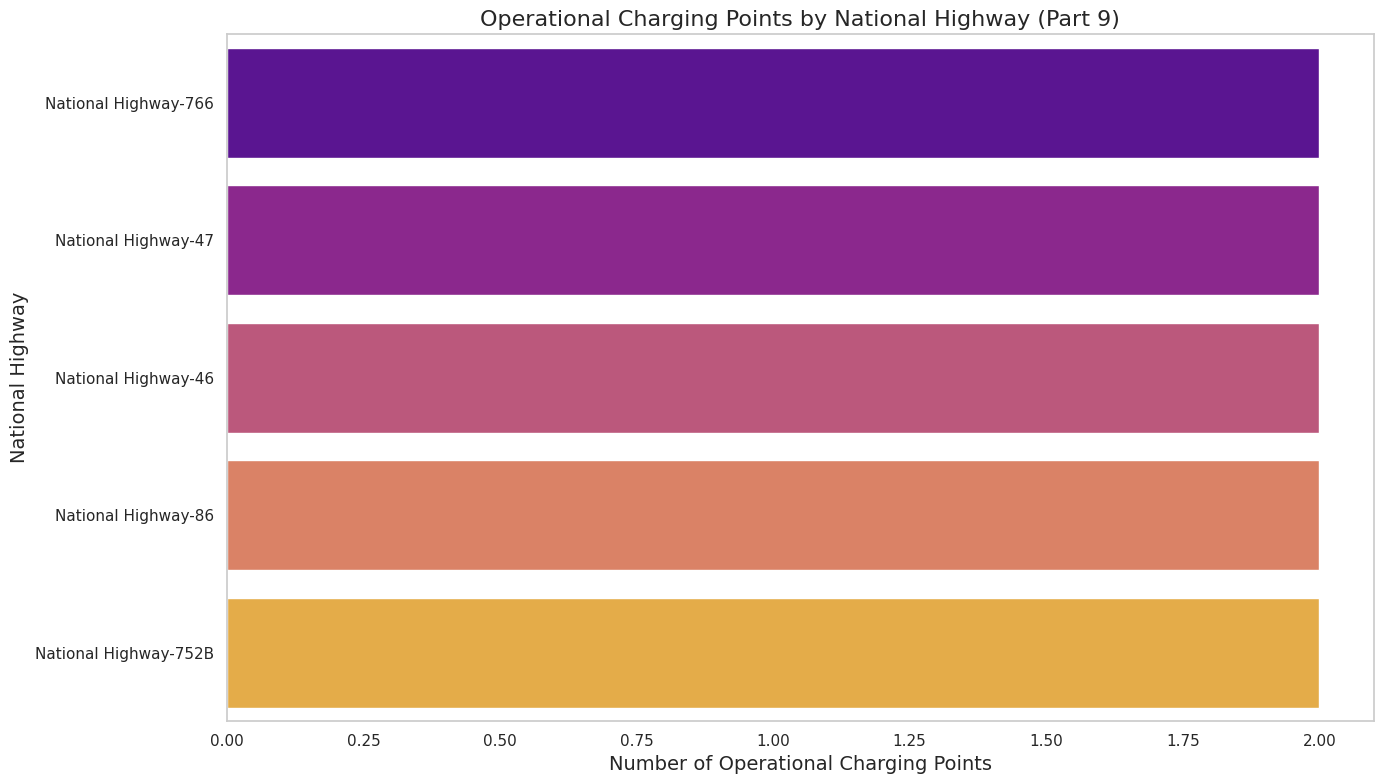

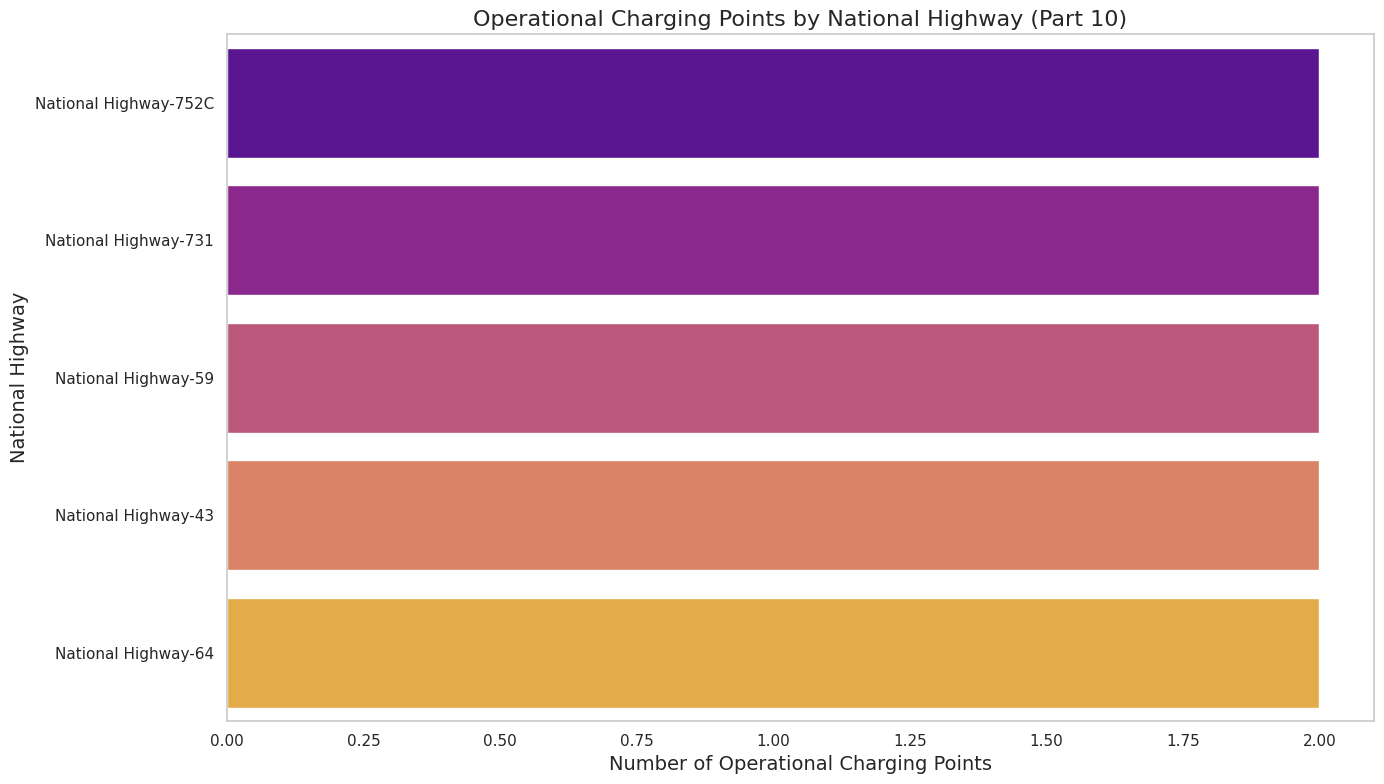

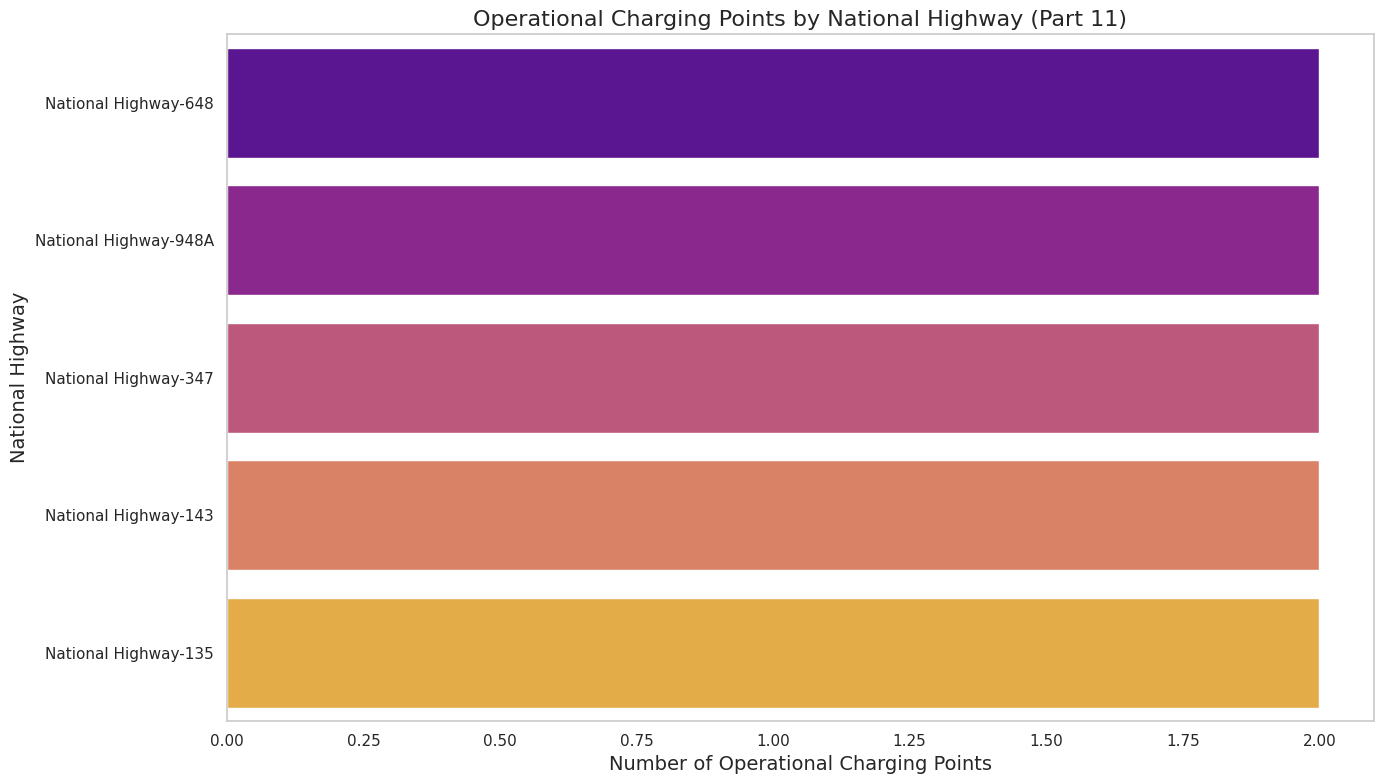

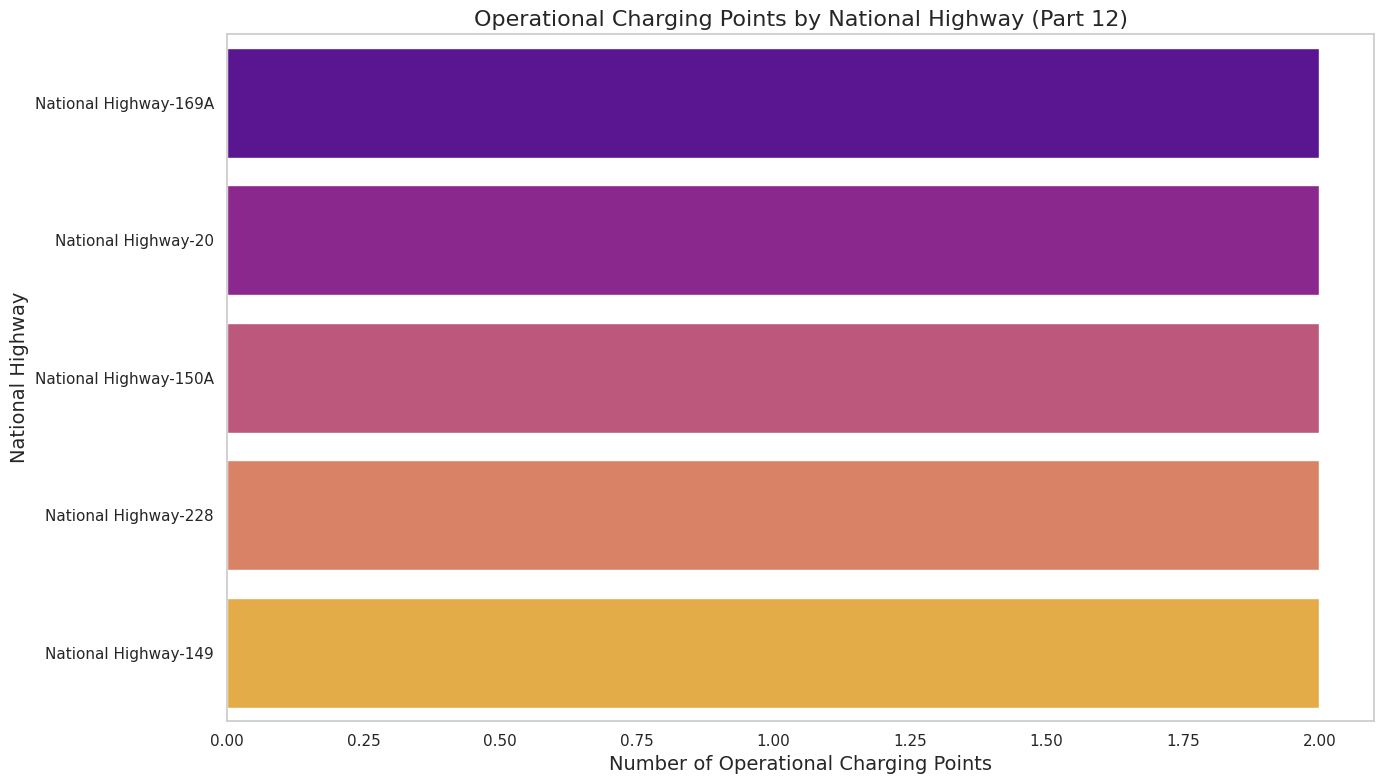

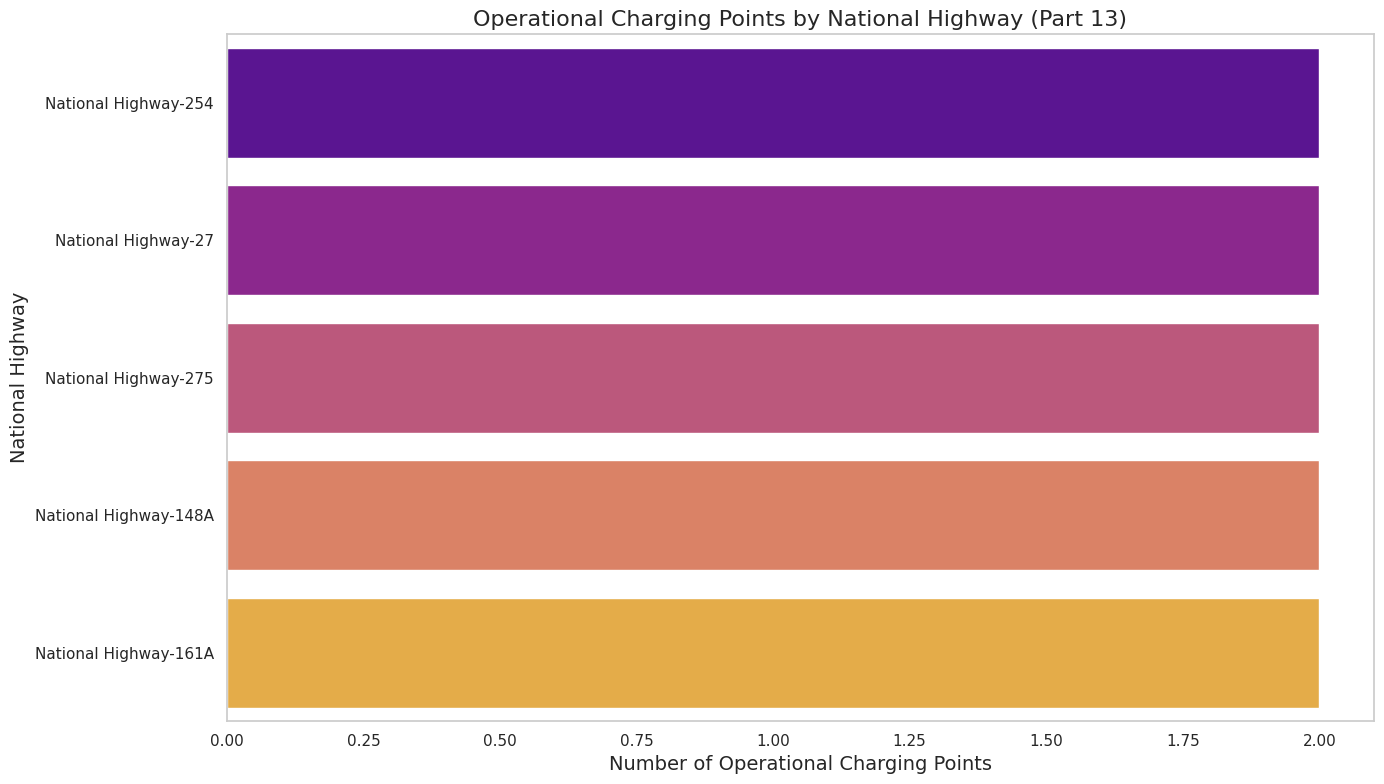

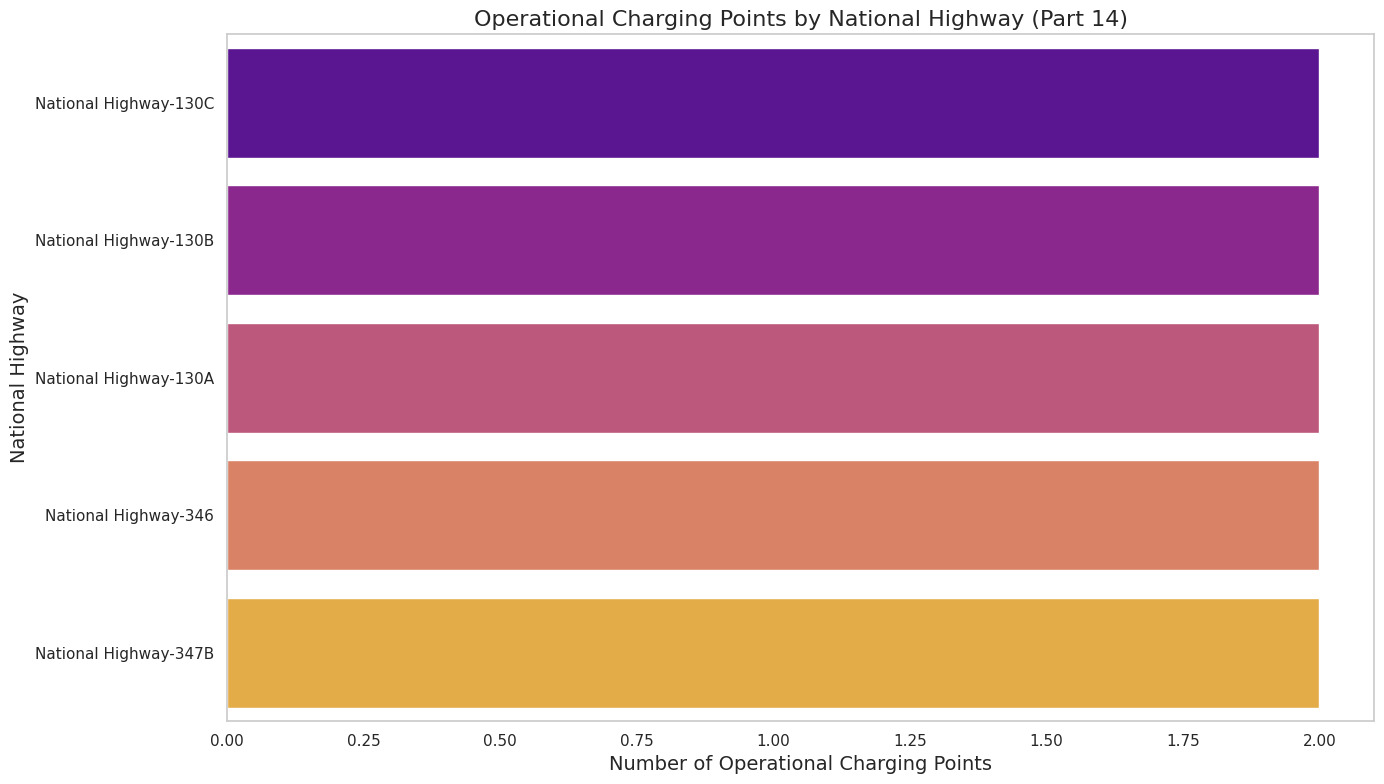

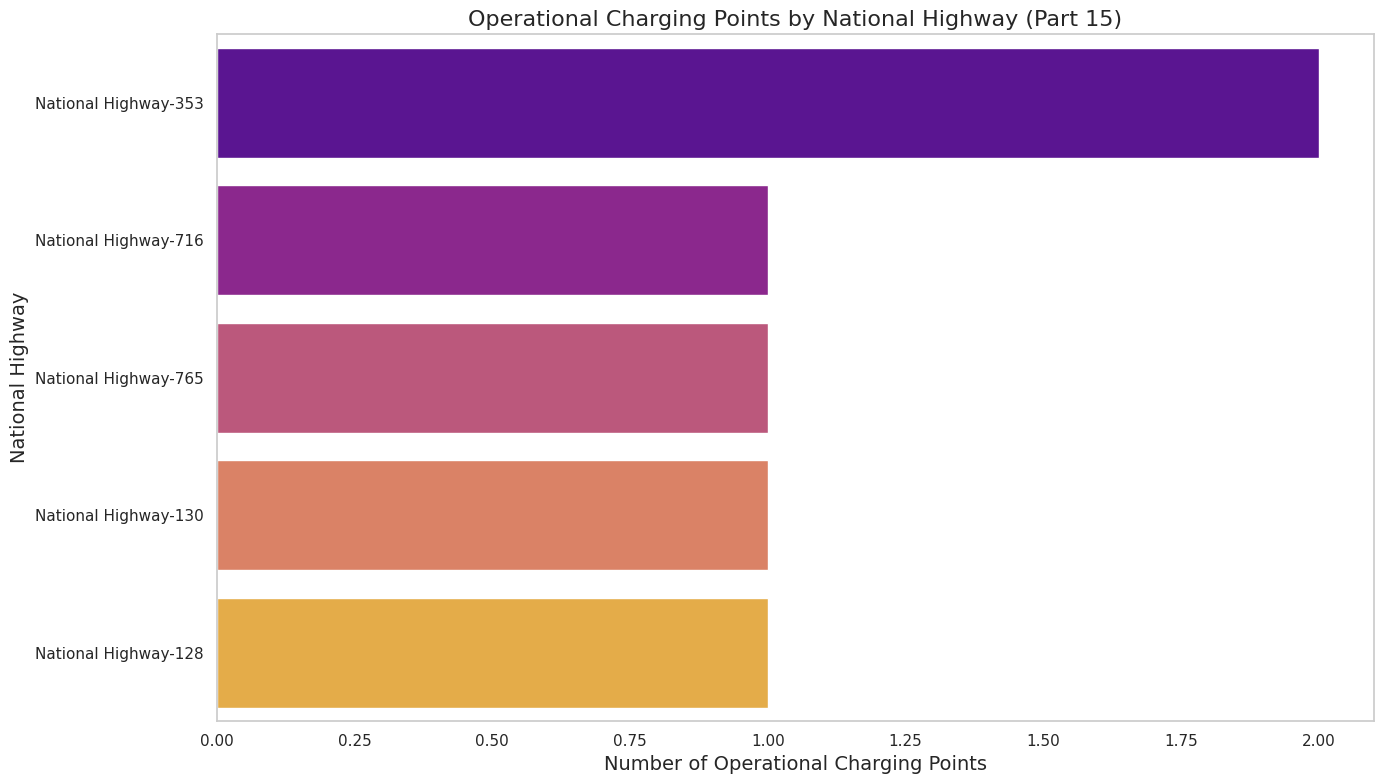

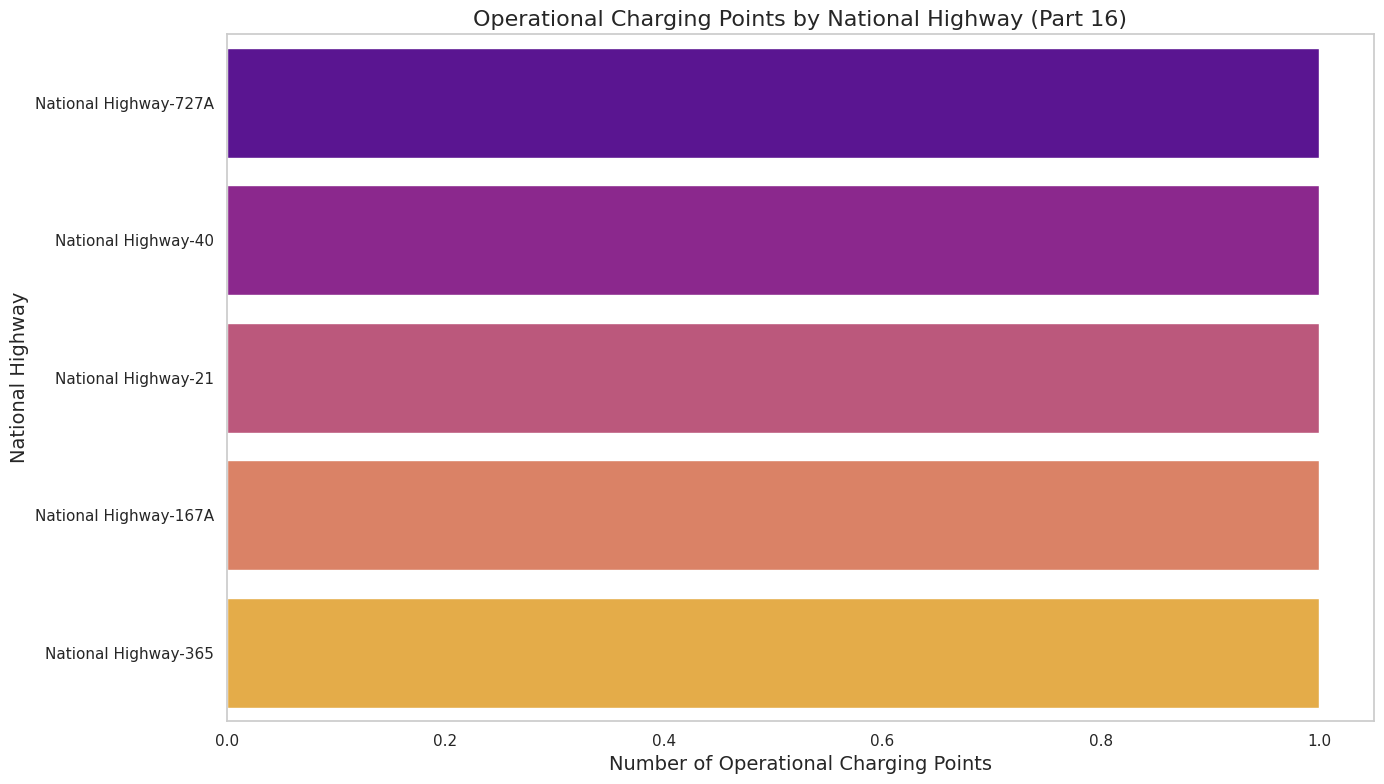

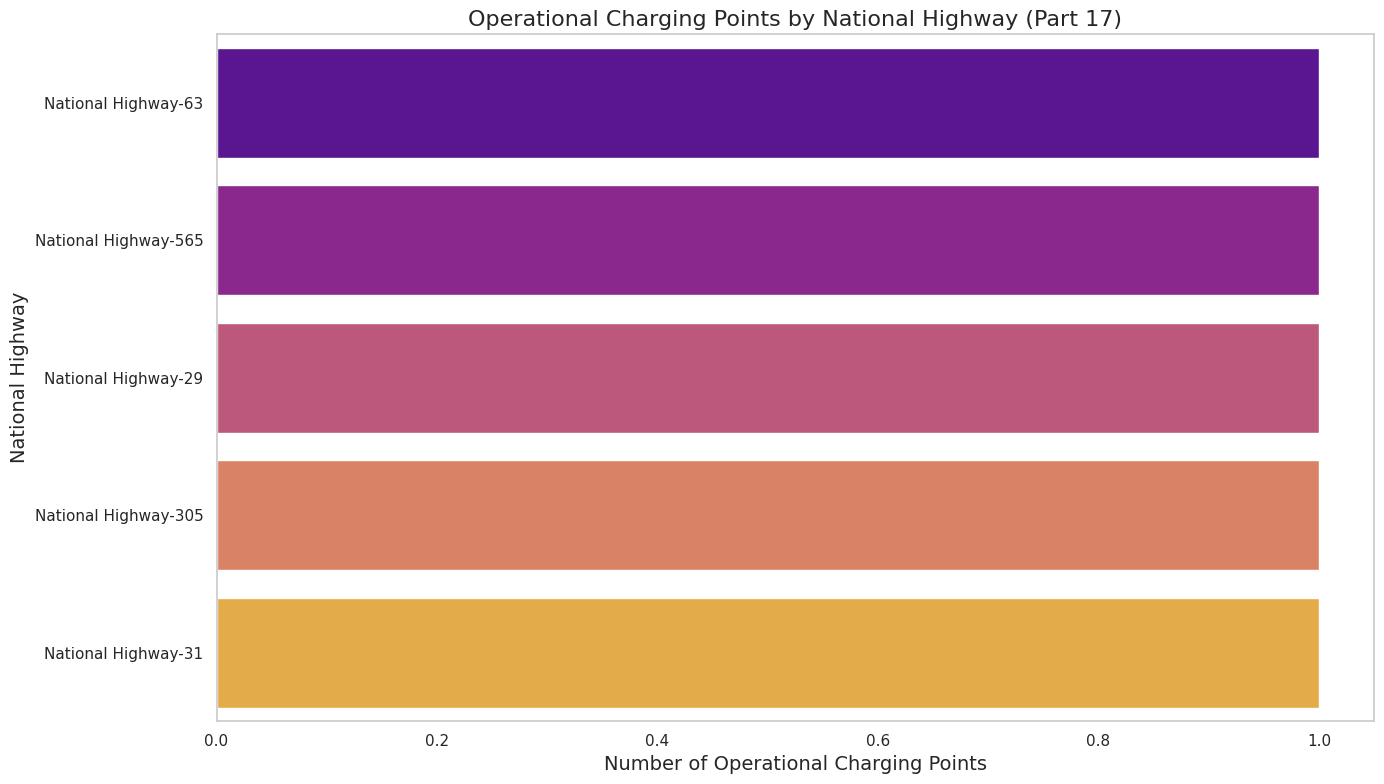

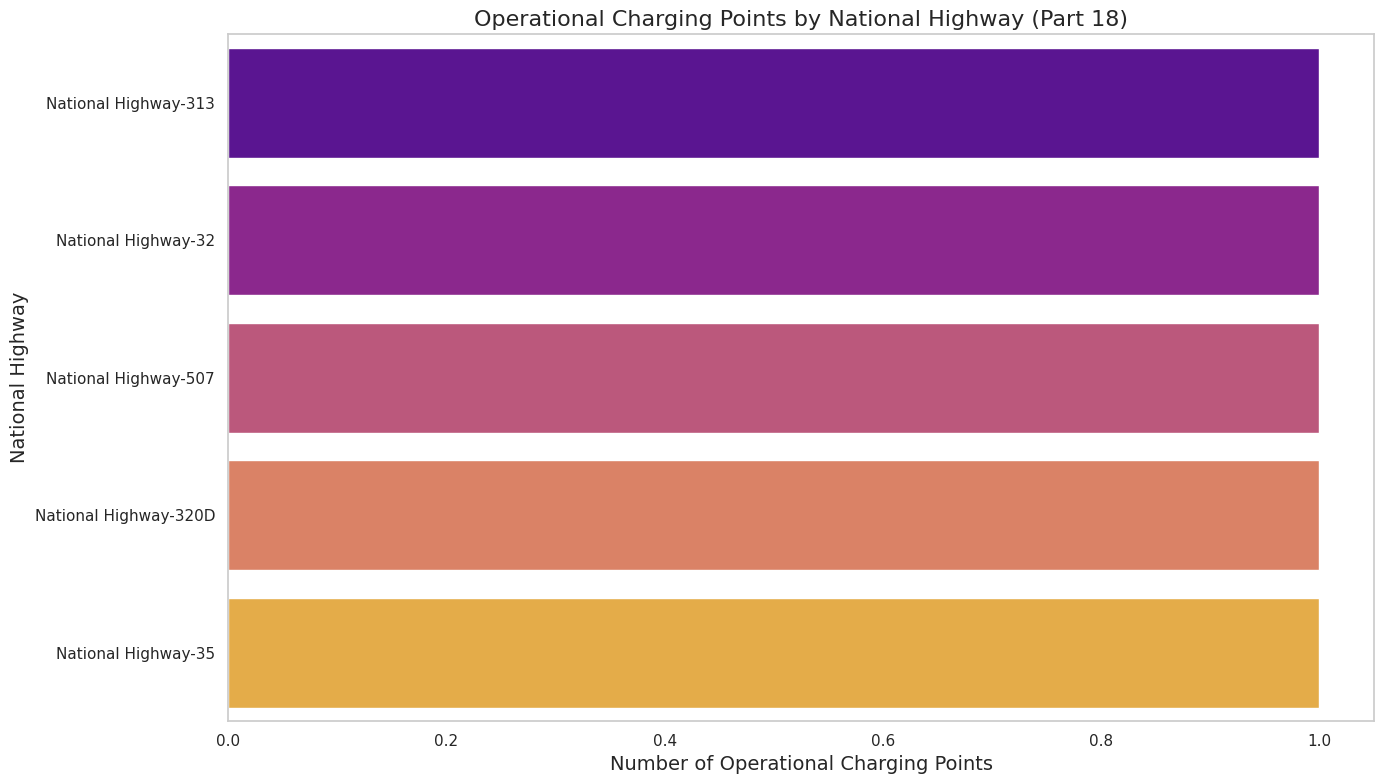

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


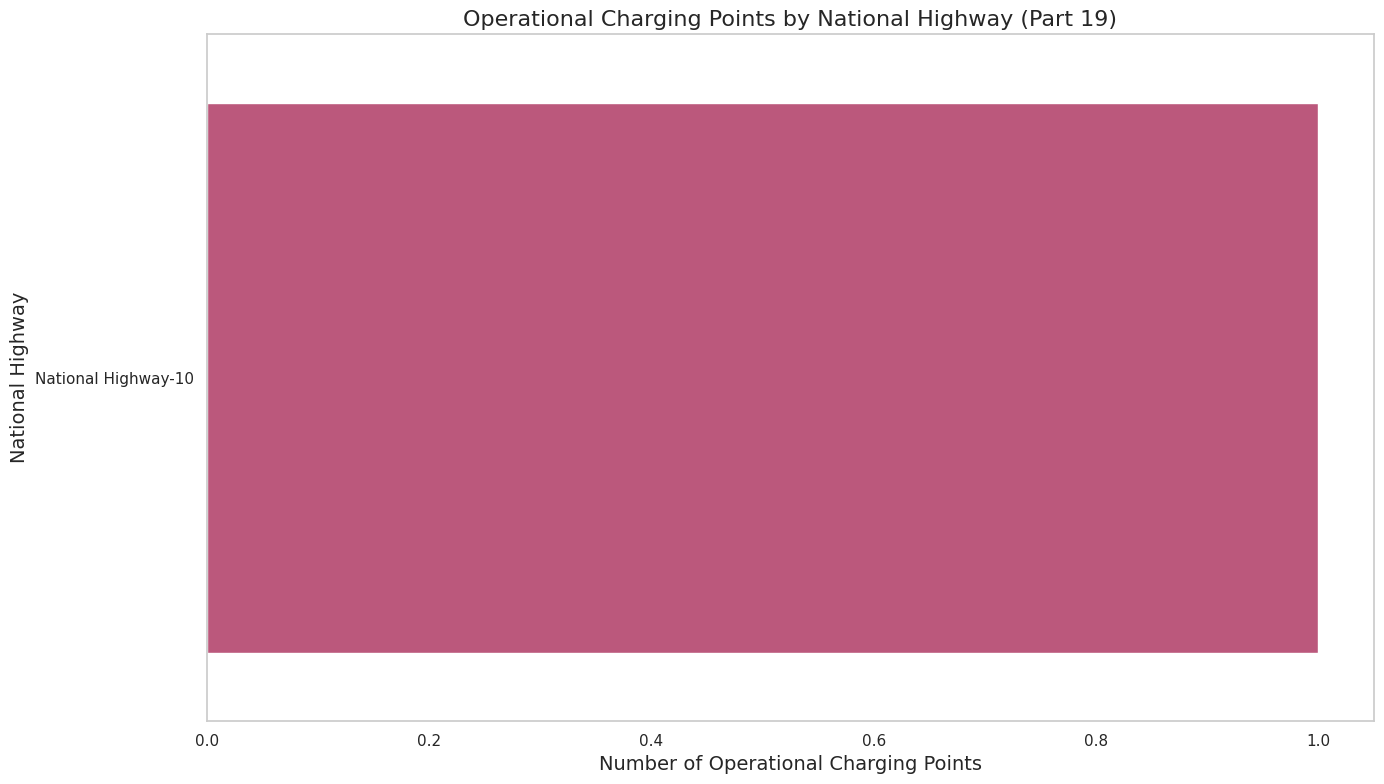

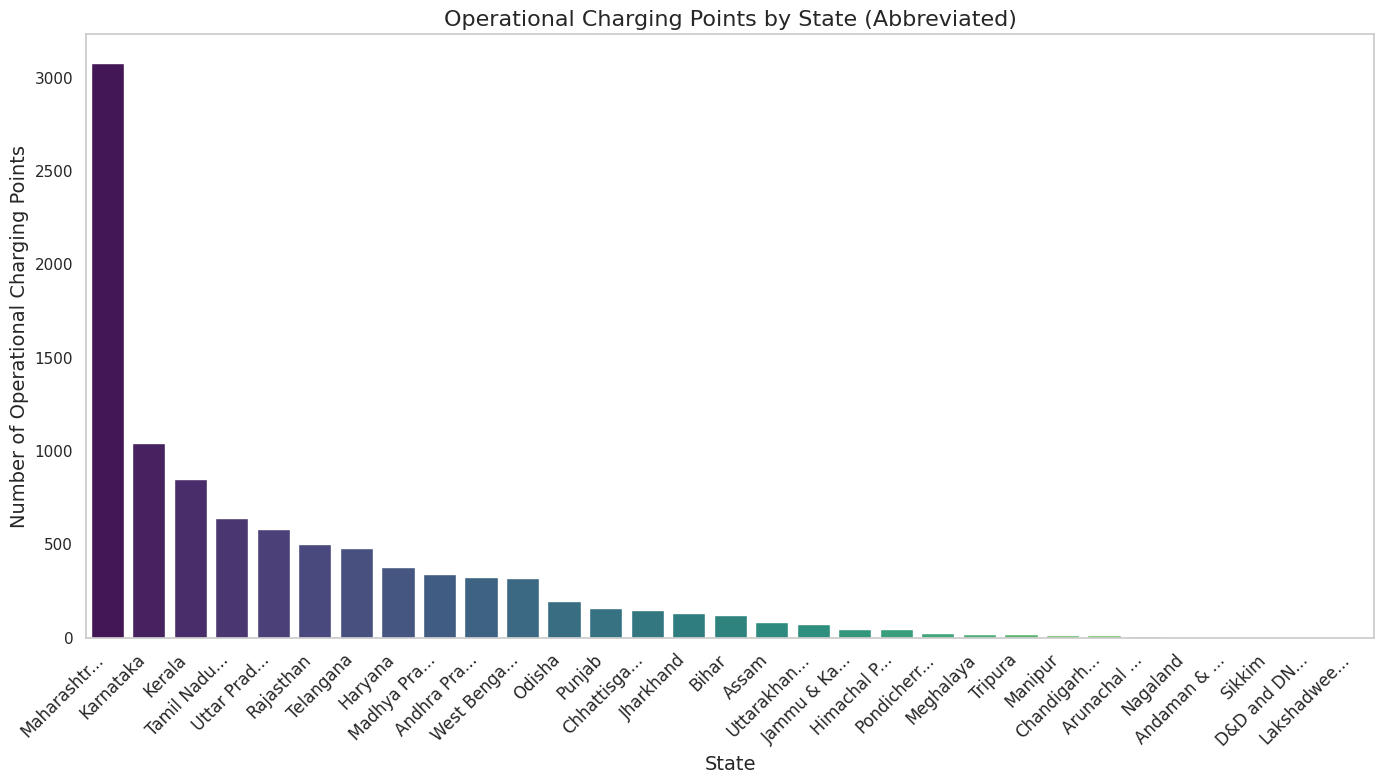

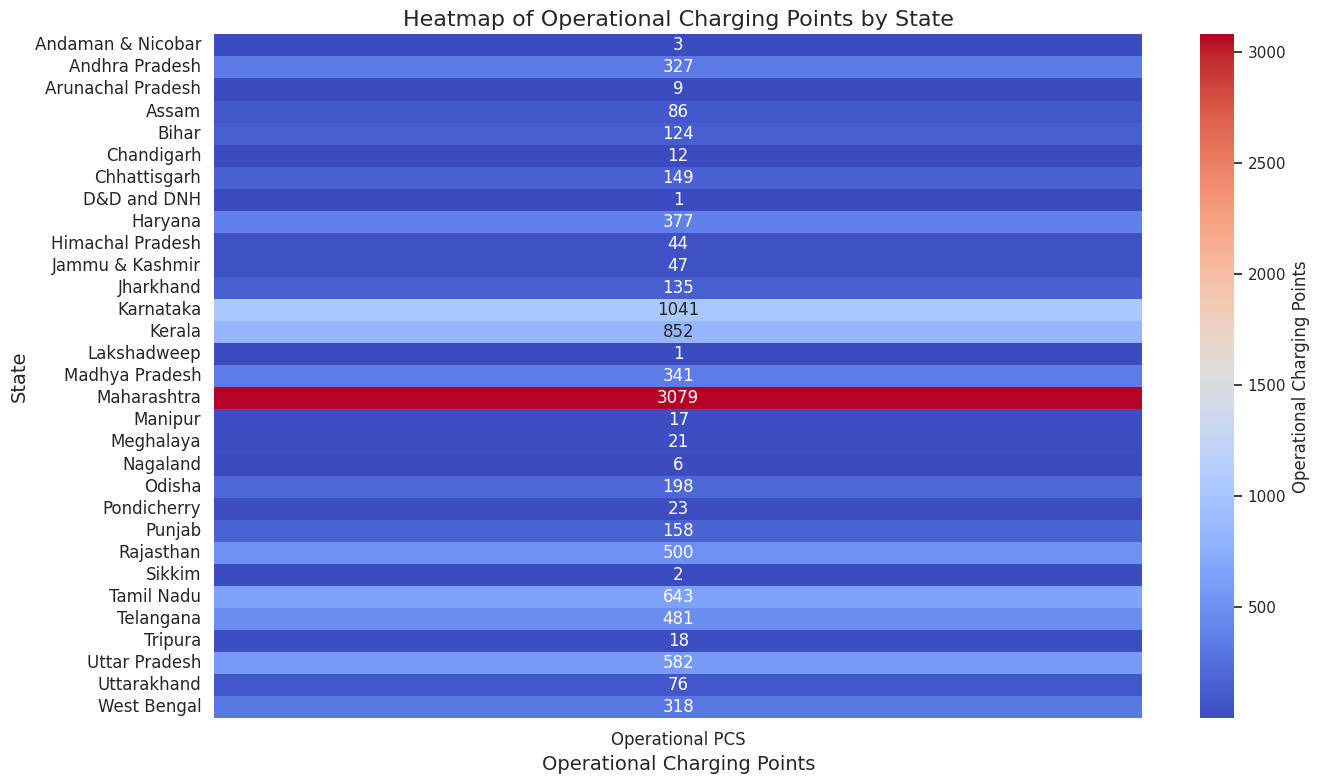

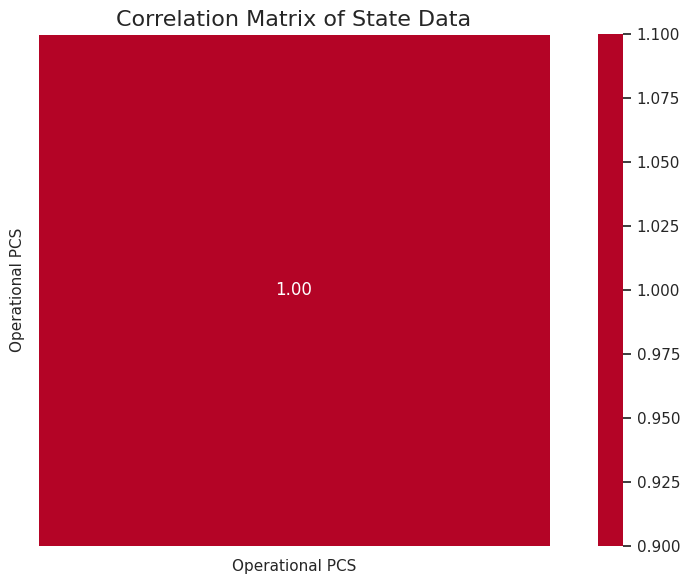

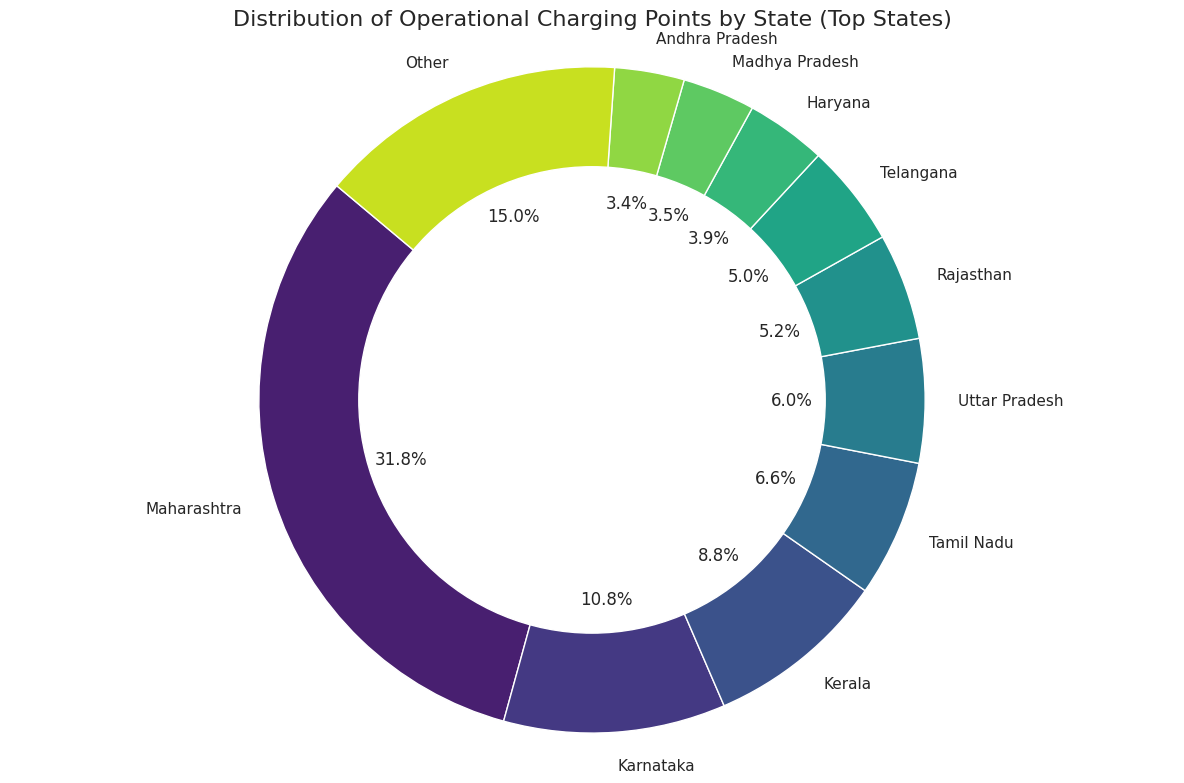

In [28]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual style
sns.set(style='whitegrid')

# Step 2: Load datasets
# Ensure these paths match your uploaded datasets in Kaggle
charging_points = pd.read_csv('/kaggle/input/charging-points/charging_points.csv')
state_data = pd.read_csv('/kaggle/input/state-operational-pcs/state_data.csv')
highway_data = pd.read_csv('/kaggle/input/highway-operational-pcs/highway_data.csv')

# Display first few rows of each dataset
print("Charging Points Data:")
print(charging_points.head())
print("\nState Data:")
print(state_data.head())
print("\nHighway Data:")
print(highway_data.head())

# Step 3: Exploratory Data Analysis (EDA)

# 1. Analyzing charging points over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=charging_points, x='year', y='value', marker='o', color='b')
plt.title('Publicly Available Charging Points in India (2017-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Charging Points', fontsize=14)
plt.xticks(charging_points['year'].unique(), fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# 2. State-wise operational PCS distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=state_data.sort_values(by='Operational PCS', ascending=False), 
            x='State', y='Operational PCS', palette='viridis')
plt.title('Operational Charging Points by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Operational Charging Points', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Operational Charging Points by National Highway - divided into separate graphs
# Define a function to plot highway data in chunks
def plot_highways(highway_data, chunk_size=5):
    num_chunks = len(highway_data) // chunk_size + (len(highway_data) % chunk_size > 0)
    for i in range(num_chunks):
        plt.figure(figsize=(14, 8))
        chunk = highway_data.iloc[i * chunk_size: (i + 1) * chunk_size]
        sns.barplot(data=chunk, y='National Highway', x='No. of operational PCS', palette='plasma')
        plt.title(f'Operational Charging Points by National Highway (Part {i + 1})', fontsize=16)
        plt.ylabel('National Highway', fontsize=14)
        plt.xlabel('Number of Operational Charging Points', fontsize=14)
        plt.grid(axis='x')
        plt.tight_layout()
        plt.show()

# Call the plotting function
plot_highways(highway_data.sort_values(by='No. of operational PCS', ascending=False), chunk_size=5)

# 4. Bar chart for state-wise operational PCS for clarity
plt.figure(figsize=(14, 8))
state_data['State Abbrev'] = state_data['State'].apply(lambda x: x if len(x) < 10 else x[:10] + '...')
sns.barplot(data=state_data.sort_values(by='Operational PCS', ascending=False), 
            x='State Abbrev', y='Operational PCS', palette='viridis')
plt.title('Operational Charging Points by State (Abbreviated)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Operational Charging Points', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5. Improved Heatmap for operational PCS across states
plt.figure(figsize=(14, 8))
heatmap_data = state_data.set_index('State')
sns.heatmap(heatmap_data[['Operational PCS']], annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Operational Charging Points'})
plt.title('Heatmap of Operational Charging Points by State', fontsize=16)
plt.xlabel('Operational Charging Points', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 6. Correlation matrix visualization for state data
plt.figure(figsize=(10, 6))
correlation = state_data[['Operational PCS']].corr()  # Update correlation to include relevant variables
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=.5, square=True)
plt.title('Correlation Matrix of State Data', fontsize=16)
plt.tight_layout()
plt.show()

# 7. Improved Pie Chart for Operational Charging Points by State
plt.figure(figsize=(12, 8))

# Calculate percentage and filter to show top N states
top_n = 10  # Specify how many states to show
state_data_sorted = state_data.sort_values(by='Operational PCS', ascending=False)
top_states = state_data_sorted.head(top_n)
other_states_sum = state_data_sorted.iloc[top_n:]['Operational PCS'].sum()

# Create a new DataFrame with "Other" category
other_states_df = pd.DataFrame({'State': ['Other'], 'Operational PCS': [other_states_sum]})
pie_data = pd.concat([top_states[['State', 'Operational PCS']], other_states_df], ignore_index=True)

# Create the pie chart (donut style)
plt.pie(pie_data['Operational PCS'], labels=pie_data['State'], autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(pie_data)))

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie chart is circular
plt.axis('equal')  
plt.title('Distribution of Operational Charging Points by State (Top States)', fontsize=16)
plt.tight_layout()
plt.show()

  region  year  value
0  India  2016     25
1  India  2017     25
2  India  2017    220
3  India  2018     25
4  India  2018    330
               State  Operational PCS
0  Andaman & Nicobar                3
1     Andhra Pradesh              327
2  Arunachal Pradesh                9
3              Assam               86
4              Bihar              124
       National Highway  No. of operational PCS
0   National Highway-10                       1
1   National Highway-11                       3
2  National Highway-128                       1
3   National Highway-13                       3
4  National Highway-130                       1


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


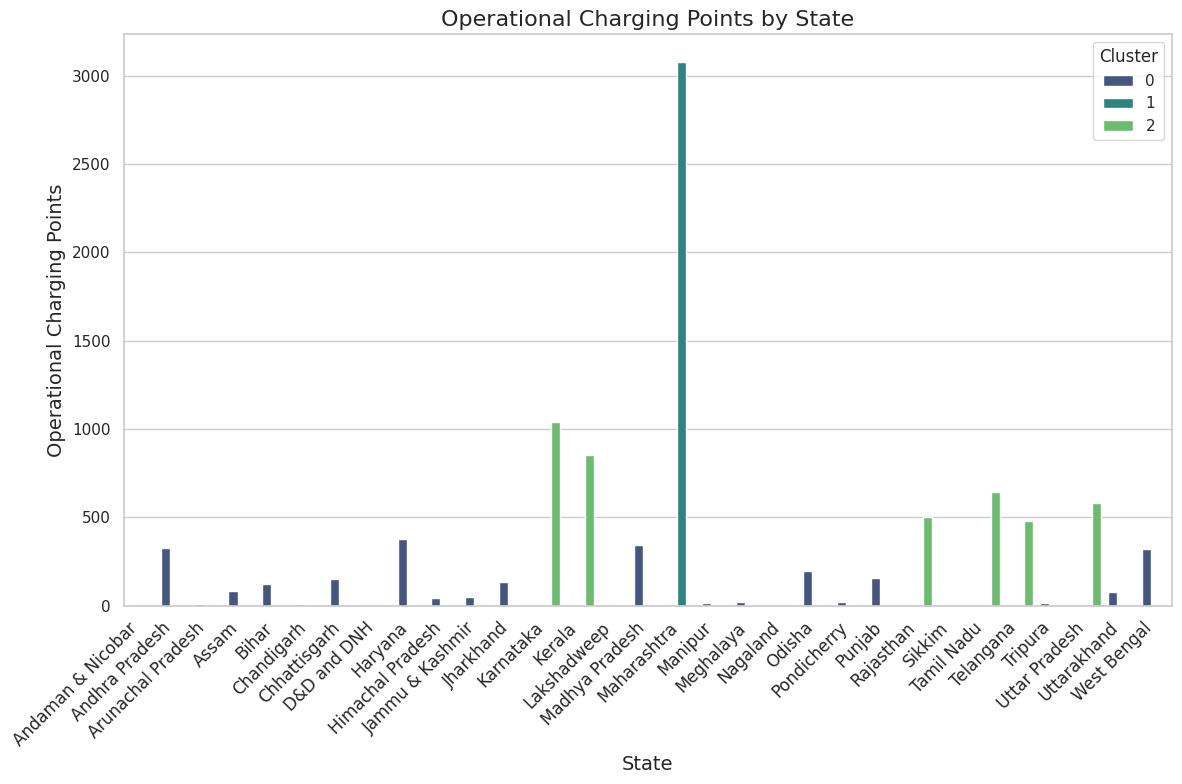

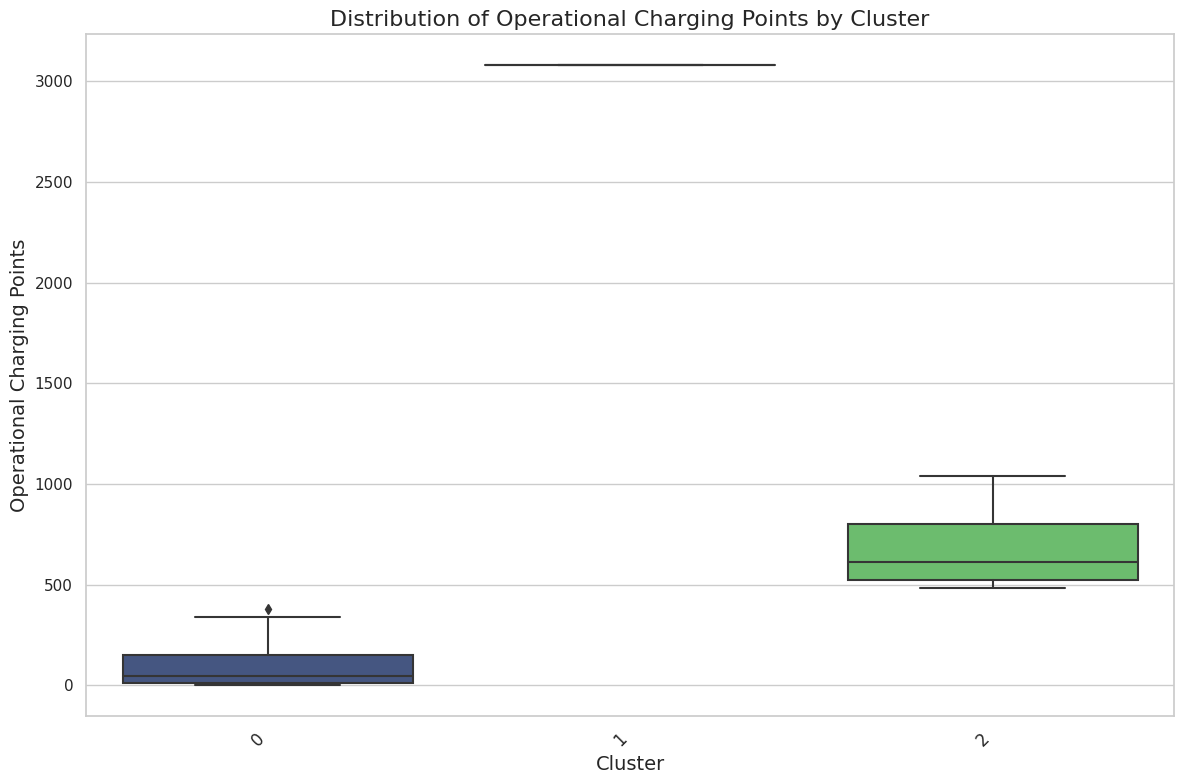

Cluster Centers (Operational Charging Points):
[[ 103.875     ]
 [3079.        ]
 [ 683.16666667]]


In [29]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set up visual style
sns.set(style='whitegrid')

# Step 2: Load datasets
charging_points = pd.read_csv('/kaggle/input/charging-points/charging_points.csv')
state_data = pd.read_csv('/kaggle/input/state-operational-pcs/state_data.csv')
highway_data = pd.read_csv('/kaggle/input/highway-operational-pcs/highway_data.csv')

# Step 3: Data Preparation
# Check for missing values and drop if any
charging_points.dropna(inplace=True)
state_data.dropna(inplace=True)
highway_data.dropna(inplace=True)

# Check the structure of the datasets
print(charging_points.head())
print(state_data.head())
print(highway_data.head())

# Step 4: Feature Engineering
# For state data, we will focus on operational PCS
state_features = state_data[['State', 'Operational PCS']]

# Normalize the features for clustering
scaler = StandardScaler()
state_features_scaled = scaler.fit_transform(state_features[['Operational PCS']])

# Step 5: Clustering
# Use KMeans to find clusters of states based on operational PCS
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters as needed
state_features['Cluster'] = kmeans.fit_predict(state_features_scaled)

# Step 6: Visualize Clusters
plt.figure(figsize=(12, 8))
sns.barplot(data=state_features, x='State', y='Operational PCS', hue='Cluster', palette='viridis')
plt.title('Operational Charging Points by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Operational Charging Points', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Step 7: Box Plot to Show Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=state_features, x='Cluster', y='Operational PCS', palette='viridis')
plt.title('Distribution of Operational Charging Points by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Operational Charging Points', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Step 8: Analyze cluster centers (rescale to original feature space)
centers = kmeans.cluster_centers_
print("Cluster Centers (Operational Charging Points):")
print(scaler.inverse_transform(centers))  # Rescale to original feature space

